In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
%matplotlib inline

class Perceptron:

    def __init__(self, eta=0.10, epochs=50, is_verbose = False):
        
        self.eta = eta
        self.epochs = epochs
        self.is_verbose = is_verbose
        self.list_of_errors = []
        
    
    def predict(self, x):
        
        ones = np.ones((x.shape[0],1))
        x_1 = np.append(x.copy(), ones, axis=1)
        #activation = self.get_activation(x_1)
        #y_pred = np.where(activation >0, 1, -1)
        #return y_pred
        return np.where(self.get_activation(x_1) > 0, 1, -1)
        
    
    def get_activation(self, x):
        
        activation = np.dot(x, self.w)
        return activation
    
    
    def fit(self, X, y):
        
        self.list_of_errors = []
        
        ones = np.ones((X.shape[0], 1))
        X_1 = np.append(X.copy(), ones, axis=1)

        self.w = np.random.rand(X_1.shape[1])
        
        for e in range(self.epochs):

            error = 0
            
            activation = self.get_activation(X_1)
            delta_w = self.eta * np.dot((y - activation), X_1)
            self.w += delta_w
            
            error = np.square(y - activation).sum()/2.0
            
            self.list_of_errors.append(error)
        
            if(self.is_verbose):
                print("Epoch: {}, weights: {}, error {}".format(
                        e, self.w, error))

Epoch: 0, weights: [0.56672948 0.56423264 0.36466443 0.32970277], error 207.11573212687966
Epoch: 1, weights: [0.55212321 0.54658176 0.32087899 0.32586345], error 179.19479326657947
Epoch: 2, weights: [0.53830977 0.530011   0.2809193  0.3222485 ], error 155.6218728155283
Epoch: 3, weights: [0.52522773 0.51443449 0.24446561 0.31884026], error 135.70654039707318
Epoch: 4, weights: [0.51282069 0.49977344 0.21122474 0.31562251], error 118.86827854344537
Epoch: 5, weights: [0.50103688 0.48595556 0.18092789 0.31258041], error 104.61897944148285
Epoch: 6, weights: [0.48982882 0.47291455 0.15332863 0.3097003 ], error 92.54822912790455
Epoch: 7, weights: [0.4791529  0.46058957 0.12820099 0.30696967], error 82.31093522145524
Epoch: 8, weights: [0.4689691  0.44892477 0.10533782 0.30437704], error 73.61692497418763
Epoch: 9, weights: [0.45924069 0.43786896 0.08454918 0.30191185], error 66.22219986063168
Epoch: 10, weights: [0.44993394 0.4273751  0.06566094 0.29956443], error 59.92158289457384
Epoc

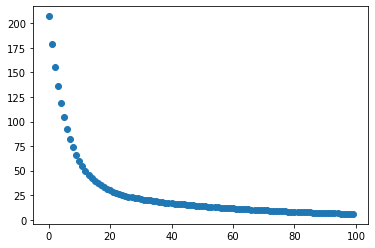

In [5]:
X = np.array([
    [2., 4.,  20.],  # 2*2 - 4*4 + 20 =   8 > 0
    [4., 3., -10.],  # 2*4 - 4*3 - 10 = -14 < 0
    [5., 6.,  13.],  # 2*5 - 4*6 + 13 =  -1 < 0
    [5., 4.,   8.],  # 2*5 - 4*4 + 8 =    2 > 0
    [3., 4.,   5.],  # 2*3 - 4*4 + 5 =   -5 < 0 
])
 
y = np.array([1, -1, -1, 1, -1])
 
perceptron = Perceptron(eta=0.0001, epochs=100, is_verbose=True)            
perceptron.fit(X, y)
plt.scatter(range(perceptron.epochs), perceptron.list_of_errors)

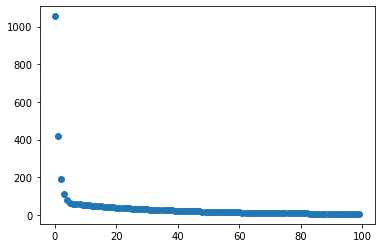

In [7]:
df = pd.read_csv(r"C:\PythonScripts\course-files2\iris.csv", header = None)
df = df.iloc[:100, :].copy()
df[4] = df[4].apply(lambda x: 1 if x == 'Iris-setosa' else -1)
df
 
X = df.iloc[0:100, :-1].values
y = df[4].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 

p = Perceptron(eta = 0.0001, epochs=100) 
p.fit(X_train, y_train)   
             
y_pred = p.predict(X_test)
 
plt.scatter(range(p.epochs), p.list_of_errors)